In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

C:\Users\1\AppData\Local\Temp\ipykernel_78676\725296308.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['wins if player keeps chosen door', 'wins if player changes chosen door']);


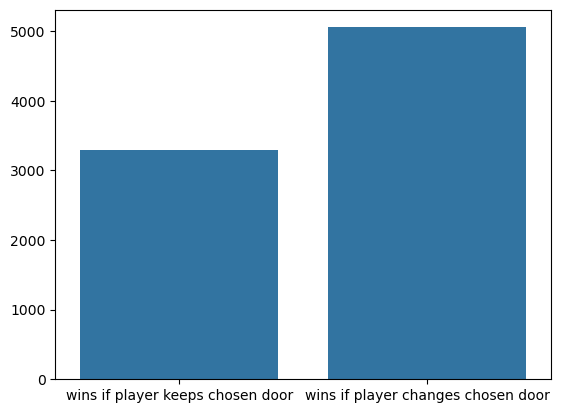

In [8]:
# Зададим итоговые массивы
wins_if_change = []
wins_if_not_change = []


for _ in range(10000):
    # Генерируем двери
    doors = {x: 0 for x in range(1, 4)}

    # Рандомно определяем, где коза и помещаем эту информацию в словарь с дверьми
    prize = np.random.choice(range(1, 4))
    doors[prize] = 1

    # Игрок выбирает дверь
    player_choice_1 = np.random.choice(range(1, 4))

    # Создадим массив с дверьми и удалим из него дверь за которой коза
    # Также попробуем удалить дверь на случай, если игрок не угадал
    # После чего возьмем случайный семпл из оставшихся, если там 2 двери. Если одна, она и будет выбрана
    se = list(range(1, 4))
    se.remove(prize)
    try:
        se.remove(player_choice_1)
    except ValueError:
        pass
    door_to_open = np.random.choice(se)

    del doors[door_to_open]

    # Проверяем, угадал ли игрок и если угадал, то в каком случае - если поменял решение или не поменял
    if prize == player_choice_1:
        wins_if_not_change.append(1)

    player_choice_2 = np.random.choice(list(doors.keys()))

    if prize == player_choice_2:
        wins_if_change.append(1)

# Готовим данные к визуализации
wins_if_change = sum(wins_if_change)
wins_if_not_change = sum(wins_if_not_change)

# Визуализируем
ax = sns.barplot([wins_if_not_change, wins_if_change]);
ax.set_xticklabels(['wins if player keeps chosen door', 'wins if player changes chosen door']);